In [1]:
import numpy as np
import math
import pygame as pg
import numpy as np
from itertools import count
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook
arr_len = 100
k1 = 1
k2 = 1
g = 1

pygame 2.0.1 (SDL 2.0.14, Python 3.8.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
class Individual():
    state_value = None
    immunity = None
    status = None
    def set_values(self,state_value):
        self.state_value = state_value
        self.immunity = 0
        self.status = ""
        if self.state_value == 6:
            self.status = "Recovered"
            
        if self.state_value == 0:
            self.status = "Healthy"

        if self.state_value>=1 and self.state_value<5:
            self.status = "Infected"
        
        if self.state_value == 5:
            self.status = "Ill"
            
        return self

In [3]:
# Function to set the initial configuration of 2D space lattice
def set_initial_config(arr_len):  
    arr = []
    for i in range(arr_len):
        cols = []
        for j in range(arr_len):
            if i>=55 and i<=60 and j>=50 and j<=55:
                individual = Individual()
                val = individual.set_values(np.random.choice(np.arange(0, 5), p=[0.85, 0.15, 0.0, 0.0, 0.0])) # randomly set initial array with 0 being highest prob
                cols.append(val)
            elif i>=10 and i<=20 and j>=10 and j<=20:
                individual = Individual()
                val = individual.set_values(np.random.choice(np.arange(0, 5), p=[0.85, 0.15, 0.0, 0.0, 0.0])) # randomly set initial array with 0 being highest prob
                cols.append(val)
            elif i>=40 and i<=45 and j>=10 and j<=20:
                individual = Individual()
                val = individual.set_values(np.random.choice(np.arange(0, 5), p=[0.85, 0.15, 0.0, 0.0, 0.0])) # randomly set initial array with 0 being highest prob
                cols.append(val)
            else:
                individual = Individual()
                val = individual.set_values(0) # randonly set initial array with 1 being highest prob
                cols.append(val)
        arr.append(cols)
    return arr   

In [4]:
# Function to apply transformation rule to present generation and return next generation
def update_next_gen(arr ,arr_len):
    arr_new = []
    # updating next generation array by considering the cell itself and the neighbours[l,t,b,r]
    for i in range(arr_len):
        cols = []
        for j in range(arr_len):
            individual = Individual()
            #------------------------------------------------- Recovered -> Infected ---------------------------------------------------------------------
            if arr[i][j].state_value == 6 and arr[i][j].immunity == 1:
                obj = individual.set_values(1)
                obj.immunity = 0
                cols.append(obj)
            #------------------------------------------------- Healthy -> Infected ---------------------------------------------------------------------
            if arr[i][j].state_value == 0 and arr[i][j].immunity == 0:
                c_infected = 0
                c_ill = 0
                if arr[(i)%arr_len][(j-1)%arr_len].state_value>0 and arr[(i)%arr_len][(j-1)%arr_len].state_value<5:
                    c_infected+=1
                if arr[(i-1)%arr_len][(j)%arr_len].state_value>0 and arr[(i-1)%arr_len][(j)%arr_len].state_value<5:
                    c_infected+=1
                if arr[(i)%arr_len][(j+1)%arr_len].state_value>0 and arr[(i)%arr_len][(j+1)%arr_len].state_value<5:
                    c_infected+=1
                if arr[(i+1)%arr_len][(j)%arr_len].state_value>0 and arr[(i+1)%arr_len][(j)%arr_len].state_value<5:
                    c_infected+=1
                    
                if arr[(i)%arr_len][(j-1)%arr_len].state_value==5:
                    c_ill+=1
                if arr[(i-1)%arr_len][(j)%arr_len].state_value==5:
                    c_ill+=1
                if arr[(i)%arr_len][(j+1)%arr_len].state_value==5:
                    c_ill+=1
                if arr[(i+1)%arr_len][(j)%arr_len].state_value==5:
                    c_ill+=1
                    
                cols.append(individual.set_values(min(5, math.floor(c_infected/k1) + math.floor(c_ill/k2) )))
                
            #------------------------------------------------- Infected -> ILL ---------------------------------------------------------------------
            if arr[i][j].state_value>0 and arr[i][j].state_value<5:
                c_infected = 0
                sum_neighbor = 0
                if arr[(i)%arr_len][(j-1)%arr_len].state_value>0 and arr[(i)%arr_len][(j-1)%arr_len].state_value<5:
                    c_infected+=1
                if arr[(i-1)%arr_len][(j)%arr_len].state_value>0 and arr[(i-1)%arr_len][(j)%arr_len].state_value<5:
                    c_infected+=1
                if arr[(i)%arr_len][(j+1)%arr_len].state_value>0 and arr[(i)%arr_len][(j+1)%arr_len].state_value<5:
                    c_infected+=1
                if arr[(i+1)%arr_len][(j)%arr_len].state_value>0 and arr[(i+1)%arr_len][(j)%arr_len].state_value<5:
                    c_infected+=1
                
                sum_neighbor =  (arr[(i)%arr_len][(j-1)%arr_len].state_value + 
                                 arr[(i-1)%arr_len][(j)%arr_len].state_value +
                                 arr[(i+1)%arr_len][(j)%arr_len].state_value +
                                 arr[(i)%arr_len][(j+1)%arr_len].state_value) 
                try:
                    v = math.floor(sum_neighbor/c_infected)
                except Exception:
                    v = 0
                
                cols.append(individual.set_values(min(5, v + g )))
                
            #------------------------------------------------- ILL -> Recovered ---------------------------------------------------------------------
            if arr[i][j].state_value==5:
                obj = individual.set_values(6)
                obj.immunity = 1
                cols.append(obj)
        arr_new.append(cols)
                                
    return arr_new

In [5]:
def count_status(ind):
    c_healthy = 0
    c_infected = 0
    c_recovered = 0
    for i in range(arr_len):
        for j in range(arr_len):
            if ind[i][j].status == "Healthy":
                c_healthy += 1
            if ind[i][j].status == "Infected" or ind[i][j].status == "Ill":
                c_infected += 1
            if ind[i][j].status == "Recovered":
                c_recovered += 1
    return c_healthy, c_infected, c_recovered

In [6]:
index = count()
c_healthy = []
c_infected = []
c_recovered = []

pg.init()
screen = pg.display.set_mode((1920, 1080))
clock = pg.time.Clock()
colors = np.array([[0, 0, 255], [120, 250, 90], [160, 250, 90], [200, 250, 90], [255, 250, 90], [255, 0, 0], [0, 255, 0]])
s = set_initial_config(arr_len)
c_h, c_i, c_r = count_status(s)
c_healthy.append(c_h)
c_infected.append(c_i)
c_recovered.append(c_r)

gridarray = []
for i in range(arr_len):
    cols = []
    for j in range(arr_len):
        cols.append(s[i][j].state_value)
    gridarray.append(cols)
surface = pg.surfarray.make_surface(colors[np.array(gridarray)])
surface = pg.transform.scale(surface, (1920, 1080))  # Scaled a bit.
u = update_next_gen(s ,arr_len)
c_h, c_i, c_r = count_status(u)
c_healthy.append(c_h)
c_infected.append(c_i)
c_recovered.append(c_r)

running = True
while running:
    for event in pg.event.get():
        if event.type == pg.QUIT:
            running = False
        
        elif event.type == pg.KEYDOWN:
            if event.key == pg.K_ESCAPE:
                running = False # to exit `while running:`
                
    screen.fill((30, 30, 30))
    screen.blit(surface, (100, 100))
    pg.display.flip()
    gridarray = []
    for i in range(arr_len):
        cols = []
        for j in range(arr_len):
            cols.append(u[i][j].state_value)
        gridarray.append(cols)
    surface = pg.surfarray.make_surface(colors[np.array(gridarray)])
    surface = pg.transform.scale(surface, (1920, 1080))  # Scaled a bit.
    u = update_next_gen(u,arr_len)
    c_h, c_i, c_r = count_status(u)
    c_healthy.append(c_h)
    c_infected.append(c_i)
    c_recovered.append(c_r)
    clock.tick(13)
    
pg.quit()

<ipython-input-4-1a8e21ee2328>:56: RuntimeWarning: invalid value encountered in long_scalars
  v = math.floor(sum_neighbor/c_infected)


<IPython.core.display.Javascript object>


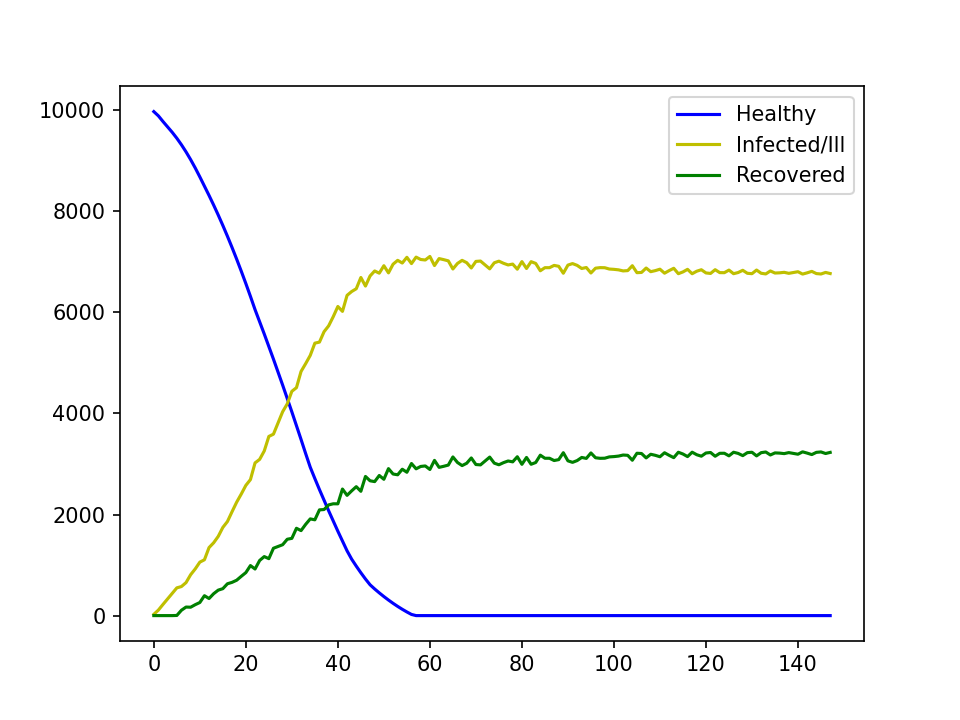

In [7]:
plt.plot(c_healthy,label='Healthy',color='blue')
plt.plot(c_infected,label='Infected/Ill',color='y')
plt.plot(c_recovered,label='Recovered',color='g')
plt.legend()

In [37]:
np.random.choice([6,7], p=[0.85, 0.15])

6